In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

In [ ]:
data = pd.read_csv('/content/new_dataset.csv')

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data)

# Split data into features (X) and target variable (y)
X = data.drop('_MICHD', axis=1)
y = data['_MICHD']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtree.predict(X_test)

In [ ]:
# Make predictions on the training set
y_train_pred = dtree.predict(X_train)

# Evaluate model performance on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred)

# Print the metric scores for the training set
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Training Confusion Matrix:\n{conf_matrix_train}')
print(f'Training Classification Report:\n{class_report_train}')

Training Accuracy: 1.00
Training Confusion Matrix:
[[290333      2]
 [    14 290383]]
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    290335
           1       1.00      1.00      1.00    290397

    accuracy                           1.00    580732
   macro avg       1.00      1.00      1.00    580732
weighted avg       1.00      1.00      1.00    580732



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.77
Confusion Matrix:
[[55347 17276]
 [15485 57076]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     72623
           1       0.77      0.79      0.78     72561

    accuracy                           0.77    145184
   macro avg       0.77      0.77      0.77    145184
weighted avg       0.77      0.77      0.77    145184



In [ ]:
pip install matplotlib seaborn

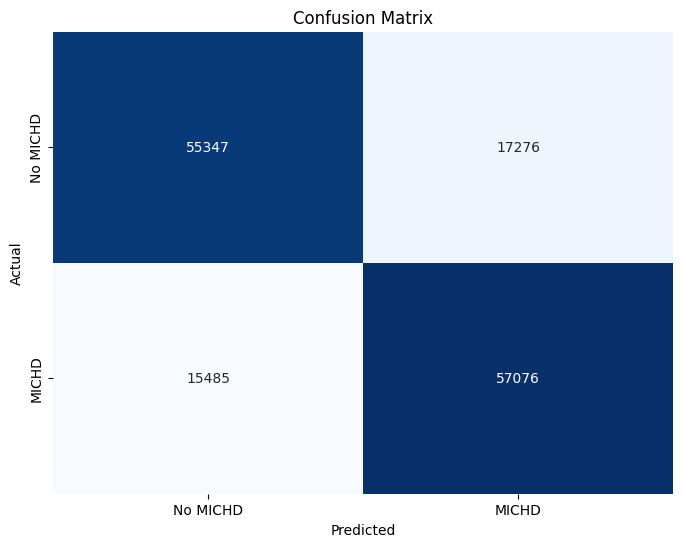

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No MICHD', 'MICHD'],
            yticklabels=['No MICHD', 'MICHD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

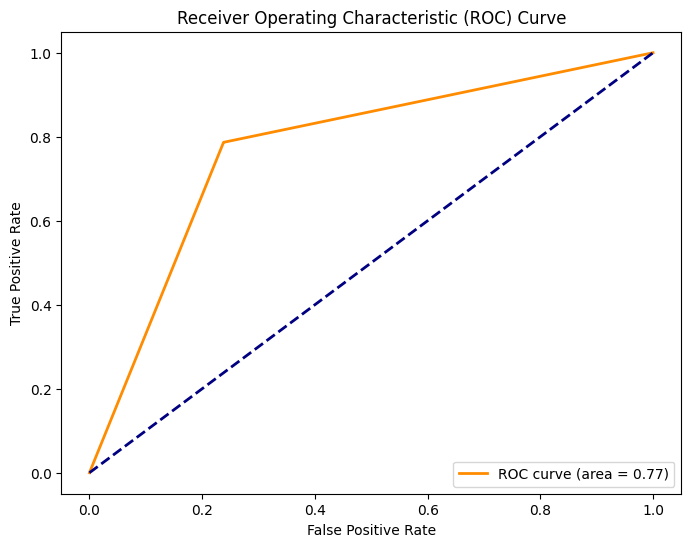

In [ ]:
# ROC Curve (if applicable)
from sklearn.metrics import roc_curve, auc

y_pred_proba = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

# Perform cross-validation
cv_results = cross_validate(dtree, X_train, y_train, cv=kf, scoring=scoring)

# Print the average scores
print(f"Cross-Validation Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Cross-Validation Precision: {np.mean(cv_results['test_precision'])}")
print(f"Cross-Validation Recall: {np.mean(cv_results['test_recall'])}")
print(f"Cross-Validation F1 Score: {np.mean(cv_results['test_f1_score'])}")


Cross-Validation Accuracy: 0.7656337201463114
Cross-Validation Precision: 0.7591976798482178
Cross-Validation Recall: 0.7781361480536713
Cross-Validation F1 Score: 0.7685475765292548


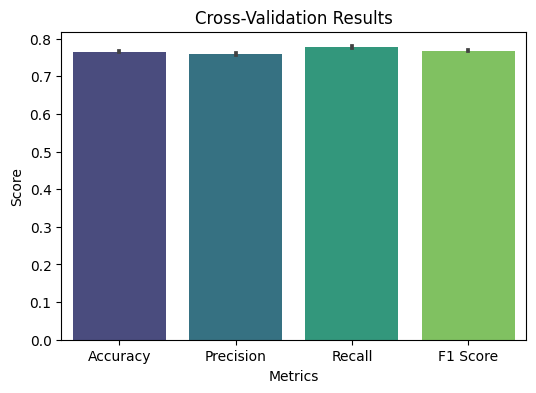

In [ ]:
# Extract individual fold results
accuracy_scores = cv_results['test_accuracy']
precision_scores = cv_results['test_precision']
recall_scores = cv_results['test_recall']
f1_scores = cv_results['test_f1_score']

# Combine scores into a single array for plotting
all_scores = [accuracy_scores, precision_scores, recall_scores, f1_scores]
score_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a grouped bar chart
plt.figure(figsize=(6, 4))
sns.barplot(data=all_scores, palette='viridis')

plt.title('Cross-Validation Results')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(ticks=[0, 1, 2, 3], labels=score_labels)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2', None]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_dtree = grid_search.best_estimator_
test_accuracy = best_dtree.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy: 0.7863607560061715


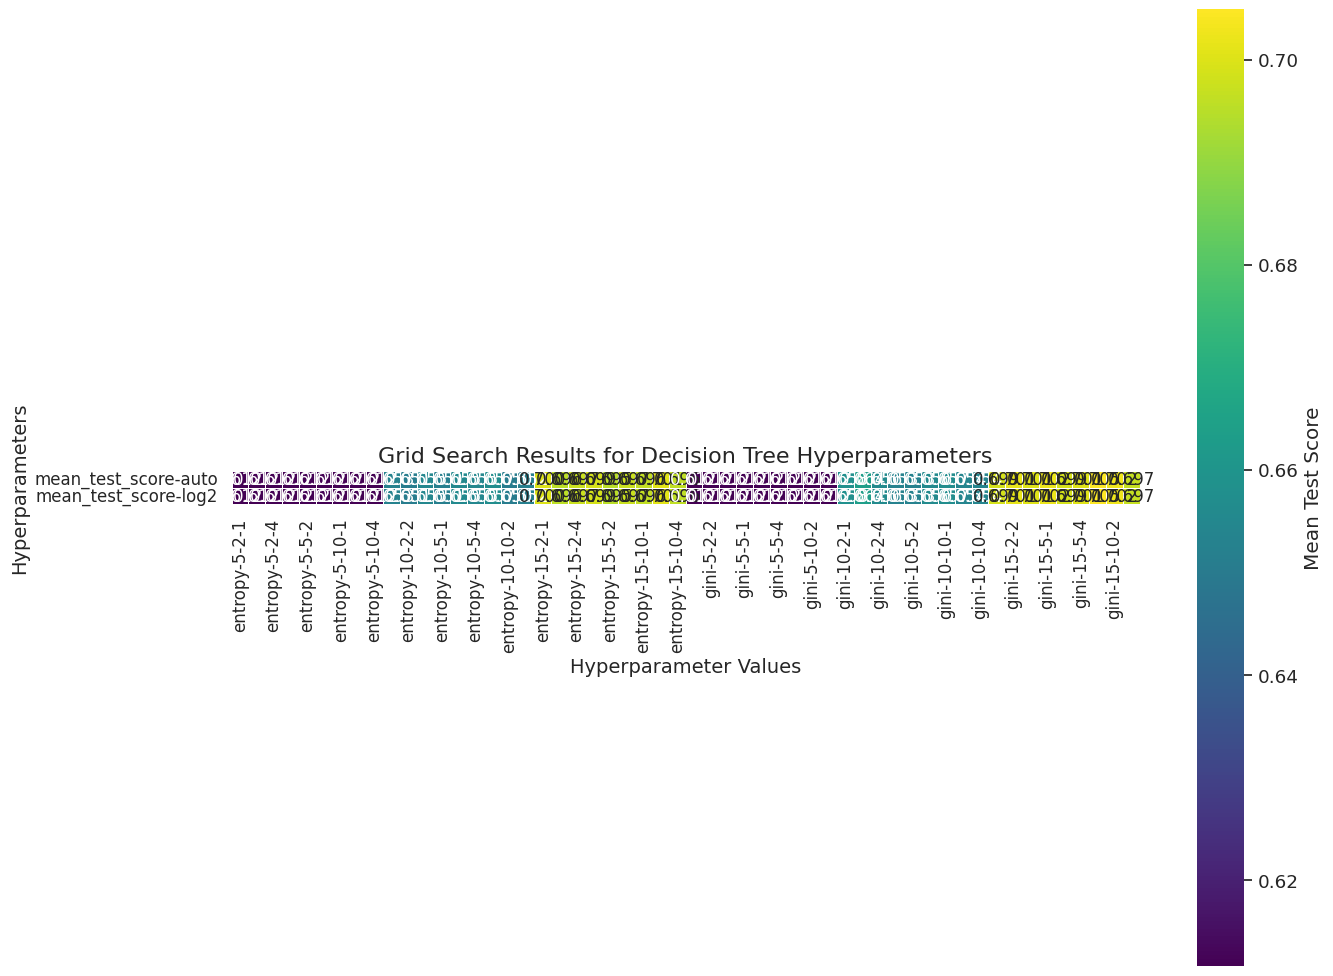

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract and organize the grid search results
results = pd.DataFrame(grid_search.cv_results_)
params_cols = [f'param_{param}' for param in param_grid.keys()]
scores = results.pivot_table(index=params_cols, values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.set(font_scale=1.2)
sns.heatmap(scores.unstack().T, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'},
            linewidths=.5, square=True, annot_kws={'size': 12})

plt.title('Grid Search Results for Decision Tree Hyperparameters', fontsize=16)
plt.xlabel('Hyperparameter Values', fontsize=14)
plt.ylabel('Hyperparameters', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


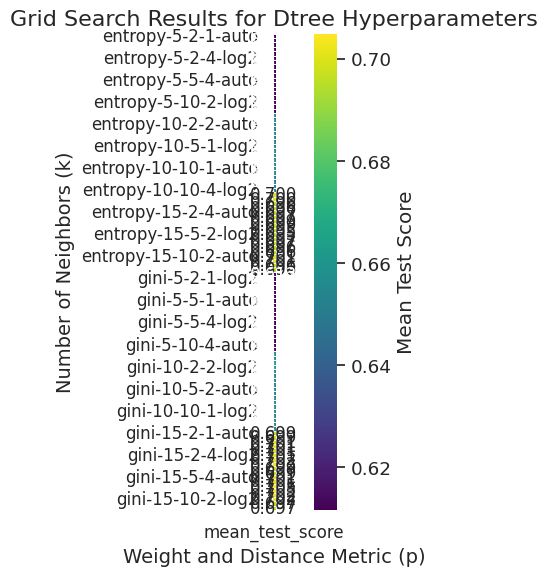

In [ ]:

# Extract and organize the grid search results
results = pd.DataFrame(grid_search.cv_results_)
params_cols = [f'param_{param}' for param in param_grid.keys()]
scores = results.pivot_table(index=params_cols, values='mean_test_score')
# Create a visually appealing heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(scores, annot=True, cmap='viridis', fmt='.3f', cbar_kws={'label': 'Mean Test Score'},
            linewidths=.5, square=True, annot_kws={'size': 12})

plt.title('Grid Search Results for Dtree Hyperparameters', fontsize=16)
plt.xlabel('Weight and Distance Metric (p)', fontsize=14)
plt.ylabel('Number of Neighbors (k)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()